1. Import the data from medical_examination.csv and assign it to the df variable.

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


2.Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [29]:
df['BMI'] = df['weight'] / ((df['height']/100)**2)

def calc_BMI(bmi):
    if bmi > 25:
        return 1
    else:
        return 0
    
df['overweight'] = df['BMI'].apply(calc_BMI)

df[['BMI', 'overweight']].head()

,BMI,overweight
0,21.967120,0
1,34.927679,1
2,23.507805,0
3,28.710479,1
4,23.011177,0


3.Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [30]:

def normalize(column):
    return column.apply(lambda x:0 if x == 1 else 1)

df.loc[:,'cholesterol'] = normalize(df['cholesterol'])
df.loc[:,'gluc'] = normalize(df['gluc'])

print(df[['cholesterol', 'gluc']].head())

   cholesterol  gluc
0            0     0
1            1     0
2            1     0
3            0     0
4            0     0


Significado de `:` e como ele funciona no contexto do `.loc` no Pandas.

---

### O que é `.loc`?
O `.loc` é um método do Pandas usado para acessar e modificar dados em um DataFrame com base em **rótulos (labels)**. Ele permite selecionar linhas e colunas específicas usando a sintaxe:

```python
df.loc[linhas, colunas]
```

- `linhas`: Especifica quais linhas você quer selecionar.
- `colunas`: Especifica quais colunas você quer selecionar.

---

### O significado de `:` no `.loc`
O `:` é um operador que significa **"tudo"** ou **"todos os elementos"** no contexto de seleção. Ele pode ser usado para selecionar todas as linhas ou todas as colunas, dependendo de onde é aplicado.

No exemplo:

```python
df.loc[:, 'cholesterol'] = normalize(df['cholesterol'])
```

Aqui está o que cada parte significa:

1. **`:` (antes da vírgula)**:
   - Significa **"todas as linhas"**.
   - Ou seja, estamos selecionando todas as linhas do DataFrame.

2. **`'cholesterol'` (depois da vírgula)**:
   - Significa **"a coluna 'cholesterol'"**.
   - Ou seja, estamos selecionando apenas a coluna `cholesterol`.

3. **Combinação `[:, 'cholesterol']`**:
   - Significa **"todas as linhas da coluna 'cholesterol'"**.
   - Isso seleciona a coluna inteira `cholesterol`.

4. **Atribuição (`= normalize(df['cholesterol'])`)**:
   - Aplica a função `normalize` à coluna `cholesterol` e atribui o resultado de volta à coluna `cholesterol` do DataFrame original.

---

### Exemplo prático
Vamos supor que você tenha o seguinte DataFrame:

```python
import pandas as pd

df = pd.DataFrame({
    'cholesterol': [1, 2, 3, 1, 2],
    'gluc': [1, 1, 2, 3, 1],
    'outra_coluna': [10, 20, 30, 40, 50]
})
```

Se você fizer:

```python
df.loc[:, 'cholesterol'] = normalize(df['cholesterol'])
```

O que está acontecendo é:

1. `df.loc[:, 'cholesterol']` seleciona **todas as linhas da coluna `cholesterol`**.
2. A função `normalize` é aplicada à coluna `cholesterol`.
3. O resultado é atribuído de volta à coluna `cholesterol` do DataFrame original.

---

### Quando usar `:`?
- Use `:` quando você quer selecionar **todas as linhas** ou **todas as colunas**.
- Exemplos:
  - `df.loc[:, 'coluna']`: Todas as linhas de uma coluna específica.
  - `df.loc[linha, :]`: Todas as colunas de uma linha específica.
  - `df.loc[:, :]`: Todas as linhas e todas as colunas (equivalente a `df`).

---

### Resumo:
- `:` significa **"tudo"** ou **"todos os elementos"**.
- No seu exemplo, `df.loc[:, 'cholesterol']` seleciona **todas as linhas da coluna `cholesterol`**.
- Isso é útil para garantir que você está modificando a coluna inteira no DataFrame original.

4.Draw the Categorical Plot in the draw_cat_plot function.

5.Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.

In [31]:
df_cat = pd.melt(df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

6.Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.

7.Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().

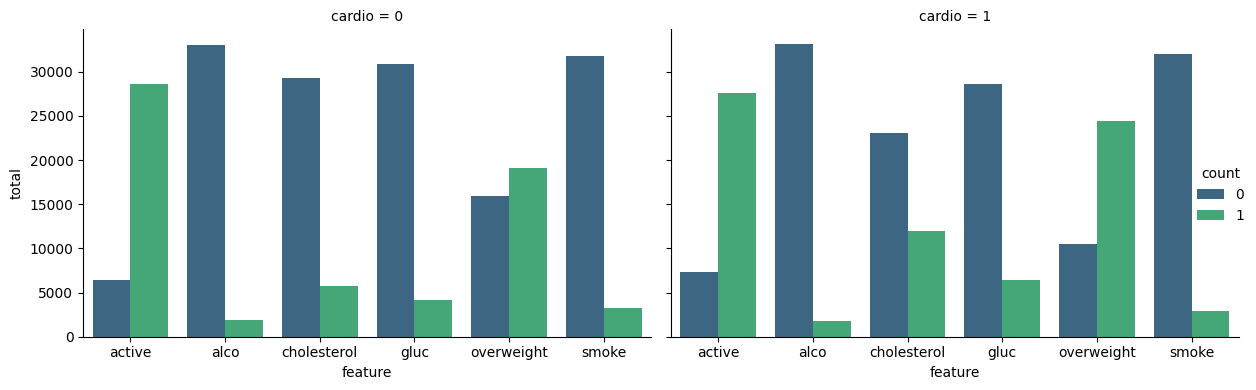

In [32]:
"""
pd.melt():

Transforma as colunas cholesterol, gluc, smoke, alco, active e overweight em um formato longo.

A coluna cardio é mantida como identificador.
"""

df_cat = pd.melt(df, id_vars=['cardio'],value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], var_name='feature', value_name='value')

df_cat = df_cat.rename(columns={'value': 'count'})


"""
groupby():

Agrupa os dados por cardio, feature e count.

Conta as ocorrências de cada combinação usando .size().
"""

df_cat = df_cat.groupby(['cardio', 'feature', 'count']).size().reset_index(name='total')

sns.catplot(
    data=df_cat,
    x='feature',       # Eixo X: features (cholesterol, gluc, etc.)
    y='total',         # Eixo Y: contagem de ocorrências
    hue='count',       # Diferentes cores para os valores (0, 1, 2, etc.)
    col='cardio',      # Dividir o gráfico por cardio (0 e 1)
    kind='bar',        # Tipo de gráfico: barras
    palette='viridis', # Esquema de cores
    height=4,          # Altura do gráfico
    aspect=1.5         # Proporção do gráfico
)

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()





Resumo:
- Use `pd.melt()` para transformar o DataFrame em formato longo.
- Agrupe e conte as ocorrências com `groupby()`.
- Visualize os dados com `sns.catplot()`.

11.Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi']))`
- height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

In [33]:
# 1. Calcular Height Percentile
height_q_low = df['height'].quantile(0.025)
height_q_high = df['height'].quantile(0.975)
print(height_q_low, height_q_high)

# 2. Calcular a Weight Percentile
weight_q_low = df['weight'].quantile(0.025)
weight_q_high = df['weight'].quantile(0.975)
print(weight_q_low, weight_q_high)

# 3. Aplicar todos os filtros de uma vez usando o Operador "&"
# Atençao aqui porque, tanto o HEIGHT e WEIGHT precisa ser: Maior ou igual o MENOR, e menor ou igual o MAIOR
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= height_q_low) & # Maior ou iqual que
    (df['height'] <= height_q_high) & # Menor ou igual que
    (df['weight'] >= weight_q_low) &
    (df['weight'] <= weight_q_high)
].copy()


print(f"Original Size: {df.shape}")
print(f"Size After Cleaning: {df_heat.shape}")

150.0 180.0
51.0 108.0
Original Size: (70000, 15)
Size After Cleaning: (63259, 15)


12.Calculate the correlation matrix and store it in the `corr` variable.

In [34]:
corr = df_heat.corr()
print(corr)

                   id       age       sex    height    weight     ap_hi  \
id           1.000000  0.002507  0.003426  0.000326  0.000149  0.003492   
age          0.002507  1.000000 -0.018132 -0.076932  0.070168  0.018689   
sex          0.003426 -0.018132  1.000000  0.505785  0.129979  0.005063   
height       0.000326 -0.076932  0.505785  1.000000  0.251503  0.004586   
weight       0.000149  0.070168  0.129979  0.251503  1.000000  0.027030   
ap_hi        0.003492  0.018689  0.005063  0.004586  0.027030  1.000000   
ap_lo        0.000484  0.153508  0.059947  0.017922  0.227922  0.072803   
cholesterol  0.003719  0.129996 -0.037605 -0.063522  0.135981  0.022807   
gluc         0.002289  0.086990 -0.021357 -0.030469  0.107072  0.011111   
smoke       -0.002732 -0.044371  0.337436  0.187830  0.056533 -0.001928   
alco        -0.000708 -0.026970  0.168637  0.089785  0.059917  0.000769   
active       0.005891 -0.011445  0.007864 -0.005661 -0.014430 -0.000222   
cardio       0.003900  0.

13.Generate a `mask` for the upper triangle and store it in the mask variable.

In [35]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

14.Set up the matplotlib figure.

In [40]:
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

15. Plot the correlation matrix using the method provided by the seaborn library import: `sns.heatmap()`


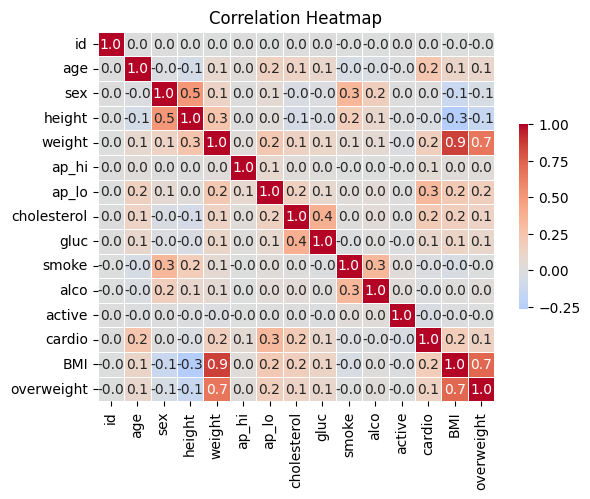

In [51]:
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=.5, cbar_kws={"shrink": .5}, fmt=".1f")

plt.title('Correlation Heatmap')
plt.show()